In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
# import data
diabetes = pd.read_csv('../Data/pima.csv')

In [12]:
# create feature and target dfs (matrix X, vector y)
X = diabetes.drop('label', axis=1)#.values
y = diabetes['label']#.values

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# instantiate model
# logreg = LogisticRegression(solver='liblinear')
logreg = LogisticRegression(max_iter=1000)

# fit model
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
# use model to predict on test set
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [30]:
logreg.predict_proba(X_test)[:,1] # slicing like this gives us the probability of the observation being a 1
# column 1 is the probability of the observation being a 0 
# column 2 is the probability of the observation being a 1 
# scikit learn uses a threshold of 0.5 to determine the class of the observation

array([0.27190251, 0.19244315, 0.11082761, 0.14512292, 0.48339522,
       0.44926688, 0.0139986 , 0.6123836 , 0.56718399, 0.78874944,
       0.25731406, 0.91356489, 0.36919268, 0.27340606, 0.07179664,
       0.36706918, 0.13341459, 0.07066215, 0.86942187, 0.57208267,
       0.20547128, 0.07549767, 0.54386984, 0.09255922, 0.55114912,
       0.89898303, 0.12269281, 0.0303765 , 0.26116552, 0.10831135,
       0.91659081, 0.87243432, 0.80254435, 0.8222802 , 0.59278836,
       0.68516802, 0.97458634, 0.23214484, 0.51504186, 0.71780956,
       0.0653789 , 0.58231975, 0.5751154 , 0.30350695, 0.02665324,
       0.5179977 , 0.61521073, 0.21614962, 0.33348517, 0.9587923 ,
       0.04742924, 0.67123653, 0.82728768, 0.23792025, 0.10173807,
       0.03875645, 0.79193604, 0.0049117 , 0.39229263, 0.77234717,
       0.75293525, 0.35265317, 0.20423632, 0.18244398, 0.07690338,
       0.65016365, 0.04719081, 0.7425416 , 0.03419915, 0.75400926,
       0.69306564, 0.06679437, 0.17244388, 0.11386513, 0.08625

In [47]:
# we can change the threshold to change the class of the observation
# thresholh 0.5:
y_pred = logreg.predict(X_test)
print('Threshold 0.5')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('\n')

# threshold 0.3:
y_pred = logreg.predict_proba(X_test)[:,1] > 0.3 # the > 0.3 is the threshold
print('Threshold 0.3')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('\n')

# threshold 0.7:
y_pred = logreg.predict_proba(X_test)[:,1] > 0.7 # the > 0.7 is the threshold
print('Threshold 0.7')
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

# recall is the the ratio of true positives to TP and FN
# precision is the ratio of true positives to TP and FP
# recall can be interpreted as the probability that the model will detect a positive case
# precision can be interpreted as the probability that the model will correctly identify a positive case

# on a threhsold scale from 0 to 1:
# at 0, all predictions are 1, so there can be no false negatives, but there will be many false positives
# at 1, all predictions are 0, so there can be no false positives, but there will be many false negatives
# thus, there is a tradeoff between precision and recall

Threshold 0.5
Accuracy:  0.7239583333333334
Precision:  0.6111111111111112
Recall:  0.6376811594202898


Threshold 0.3
Accuracy:  0.671875
Precision:  0.53125
Recall:  0.7391304347826086


Threshold 0.7
Accuracy:  0.7604166666666666
Precision:  0.7948717948717948
Recall:  0.4492753623188406


/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jake/miniconda3/envs/sportsenv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


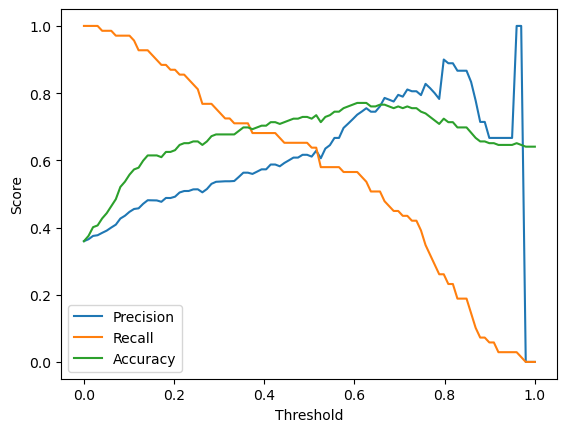

In [50]:
# plot the precision and recall for different thresholds
# precision recall curve
# threshold is the x-axis
# y-axis is precision and recall
# the curve is the tradeoff between precision and recall

# plot the precision and recall for different thresholds

# create a list of thresholds
thresholds = np.linspace(0, 1, 100)

# create empty lists for precision and recall
precisions = []
recalls = []
accuracies = []

# loop through thresholds
for thresh in thresholds:
    # create predictions using the threshold
    y_pred = logreg.predict_proba(X_test)[:,1] > thresh
    
    # calculate and append precision and recall
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    accuracies.append(accuracy_score(y_test, y_pred))

# plot the precision and recall for different thresholds
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, accuracies, label='Accuracy')
plt.legend()
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.show()